In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'



In [2]:
b = [1, 2, 3];    % s^2 + 2s + 3
a = [1, 4, 5, 6]; % s^3 + 4s^2 + 5s + 6

In [3]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

In [4]:
syms s

In [5]:
G(s) = (s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)

G(s) =
(s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)


In [6]:
[Num,Den] = numden(G(s))

Num =
s^2 + 2*s + 3
Den =
s^3 + 4*s^2 + 5*s + 6


In [7]:
nNum = sym2poly(Num), nDen = sym2poly(Den)

nNum =
     1     2     3
nDen =
     1     4     5     6


In [8]:
poly2sym(nNum,s)

ans =
s^2 + 2*s + 3


In [9]:
z = [-1; -3];
p = [0; -2; -4];

In [10]:
K = 1;

In [11]:
G = zpk(z,p,K)


G =
 
   (s+1) (s+3)
  -------------
  s (s+2) (s+4)
 
Continuous-time zero/pole/gain model.


In [12]:
[num,den]=tfdata(G,'v')

num =
     0     1     4     3
den =
     1     6     8     0


In [13]:
G2=tf(num,den)


G2 =
 
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.


In [14]:
G2 = tf(G)


G2 =
 
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.


In [15]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1
poles =
     0
    -4
    -2
gain =
     1


In [16]:
G2=tf(num,den)


G2 =
 
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.


In [17]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1
poles =
     0
    -4
    -2
gain =
     1


In [18]:
set(G,'InputName','Voltage','OutputName','Angular Position')

In [19]:
G3=zpk(z,p,K,'InputName','Armature Voltage (V)',...
    'OutputName','Load Shaft Position (rad)',...
    'notes','An armature voltage controlled servomechanism')


G3 =
 
  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":
   (s+1) (s+3)
  -------------
  s (s+2) (s+4)
 
Continuous-time zero/pole/gain model.


In [20]:
get(G3,'notes')

ans =
  1×1 cell array
    {'An armature voltage controlled servomechanism'}


In [21]:
in=G3.InputName, out=G3.OutputName

in =
  1×1 cell array
    {'Armature Voltage (V)'}
out =
  1×1 cell array
    {'Load Shaft Position (rad)'}


In [22]:
get(G3)

                Z: {[2×1 double]}
                P: {[3×1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1×1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1×1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
               Ts: 0
         TimeUnit: 'seconds'
     SamplingGrid: [1×1 struct]


In [23]:
G4 = zpk(G2)


G4 =
 
   (s+3) (s+1)
  -------------
  s (s+4) (s+2)
 
Continuous-time zero/pole/gain model.


In [24]:
G5 = tf(G)


G5 =
 
  From input "Voltage" to output "Angular Position":
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.


In [25]:
G1=tf([1 1],[1 3]);
G2=tf(10,conv([1 0],[1 2])); % conv is polynomial multiplication
Gs=G1*G2 % series connection of two LTI objects


Gs =
 
      10 s + 10
  -----------------
  s^3 + 5 s^2 + 6 s
 
Continuous-time transfer function.


In [26]:
[zeros,poles,K]=zpkdata(Gs,'v')

zeros =
    -1
poles =
         0
   -3.0000
   -2.0000
K =
    10


In [27]:
Gp = G1 + G2


Gp =
 
  s^3 + 3 s^2 + 12 s + 30
  -----------------------
     s^3 + 5 s^2 + 6 s
 
Continuous-time transfer function.


In [28]:
G = tf([2 5 1],[1 2 3],'inputname','torque',...
    'outputname','velocity');
H = zpk(-2,-10,5);

In [29]:
Gc = feedback(G,H) % negative feedback assumed


Gc =
 
  From input "torque" to output "velocity":
  0.18182 (s+0.2192) (s+2.281) (s+10)
  -----------------------------------
   (s+3.419) (s^2 + 1.763s + 1.064)
 
Continuous-time zero/pole/gain model.


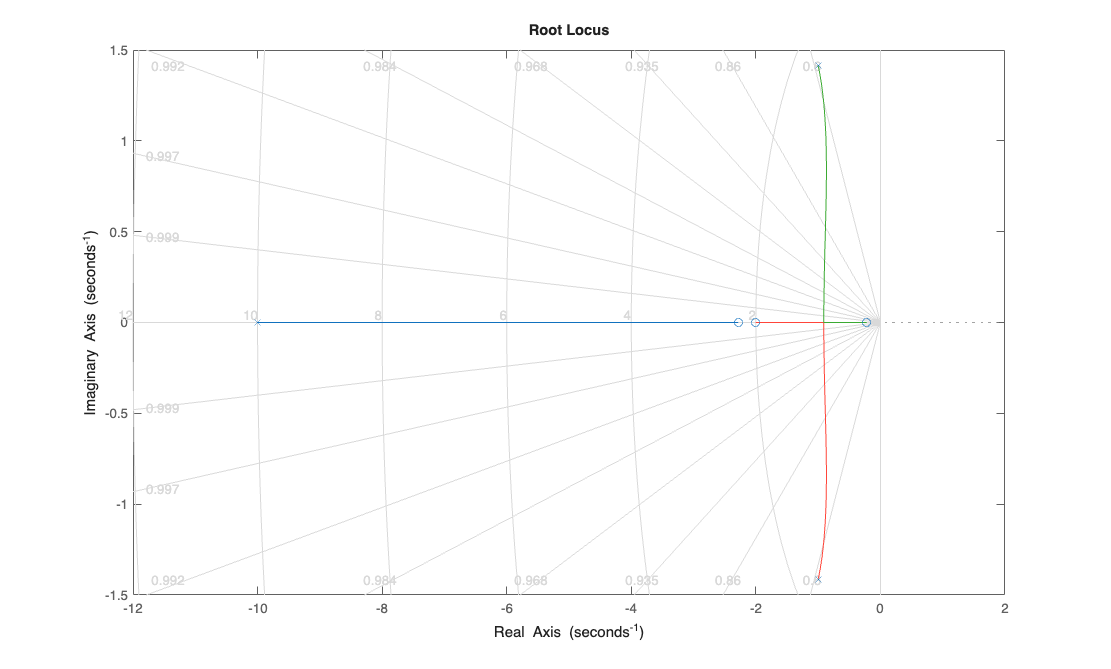

In [30]:
rlocus(G*H),sgrid

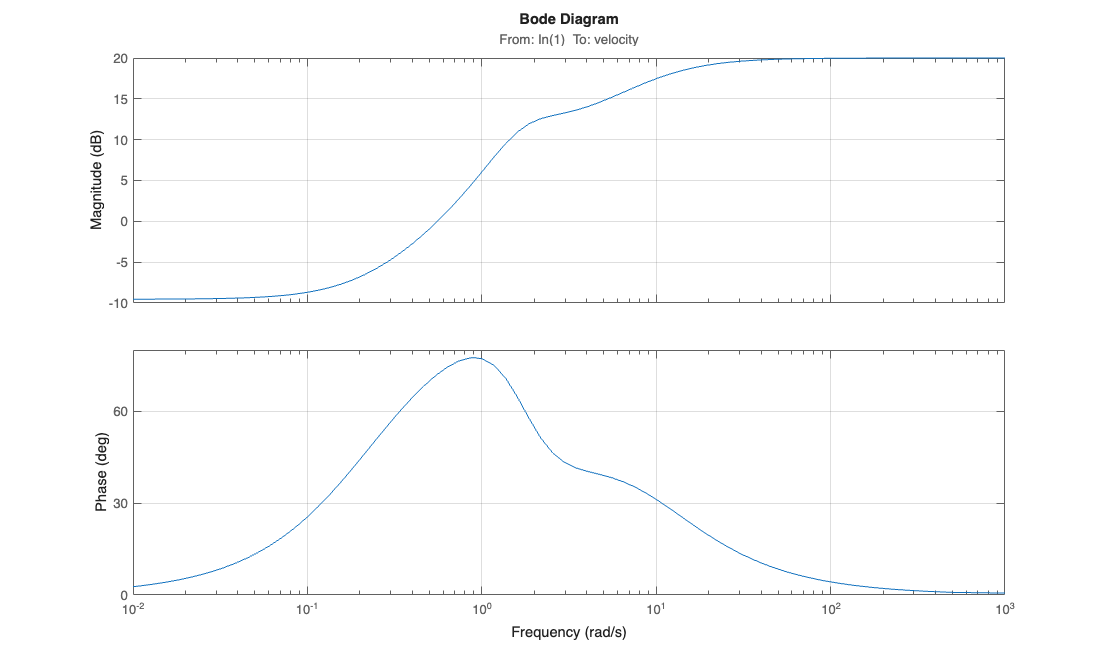

In [31]:
bode(G*H),grid

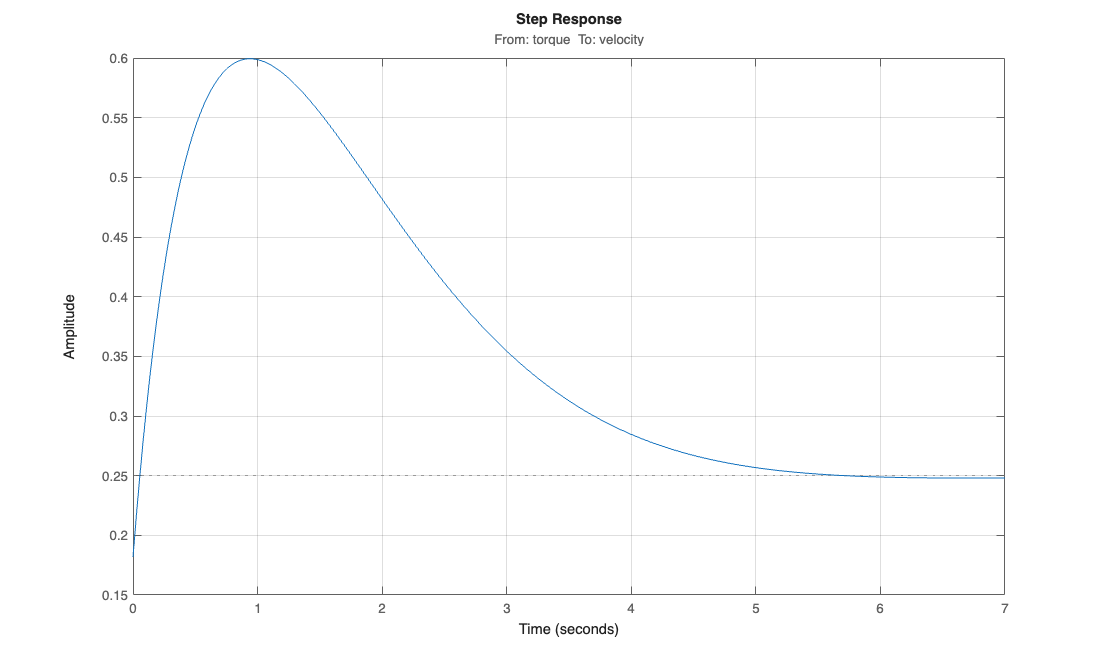

In [32]:
step(Gc),grid

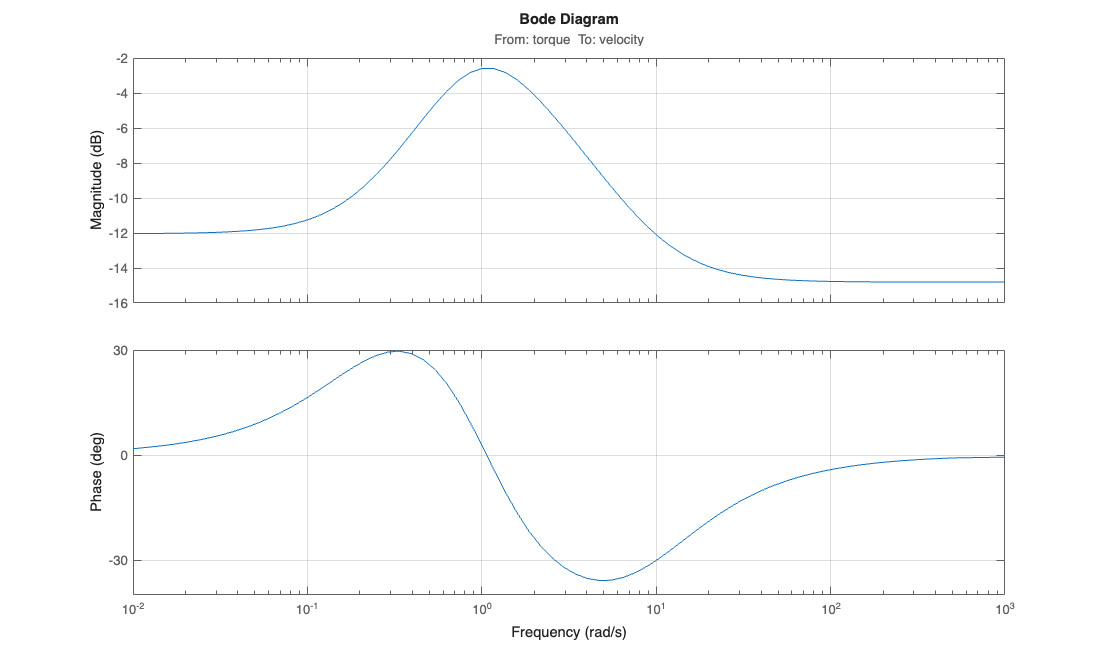

In [33]:
bode(Gc),grid

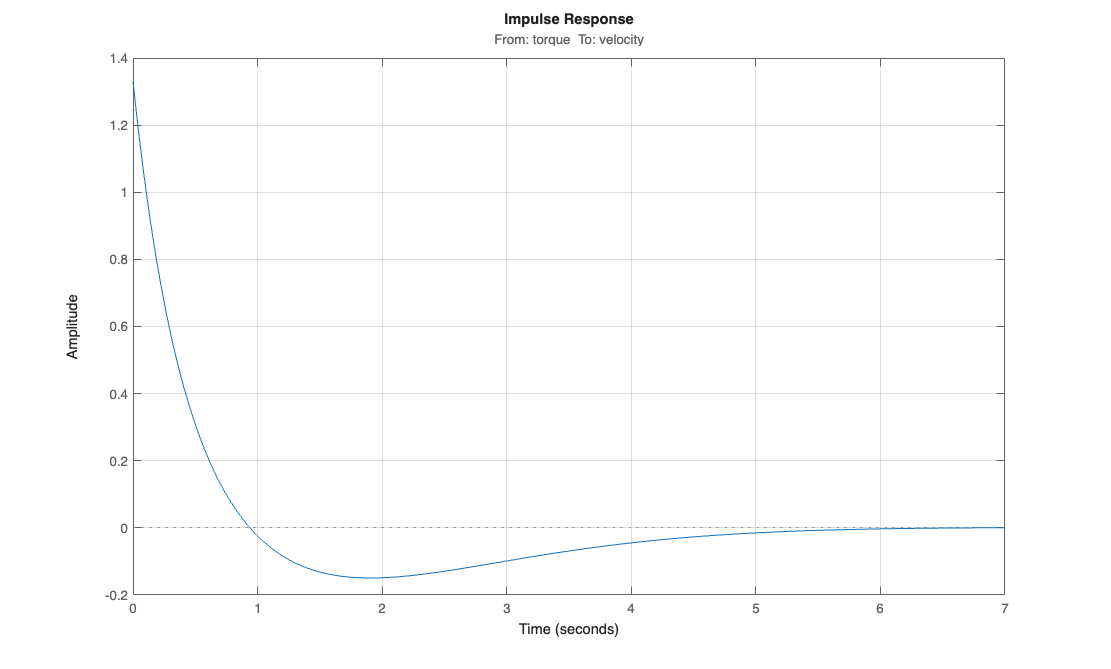

In [34]:
impulse(Gc),grid

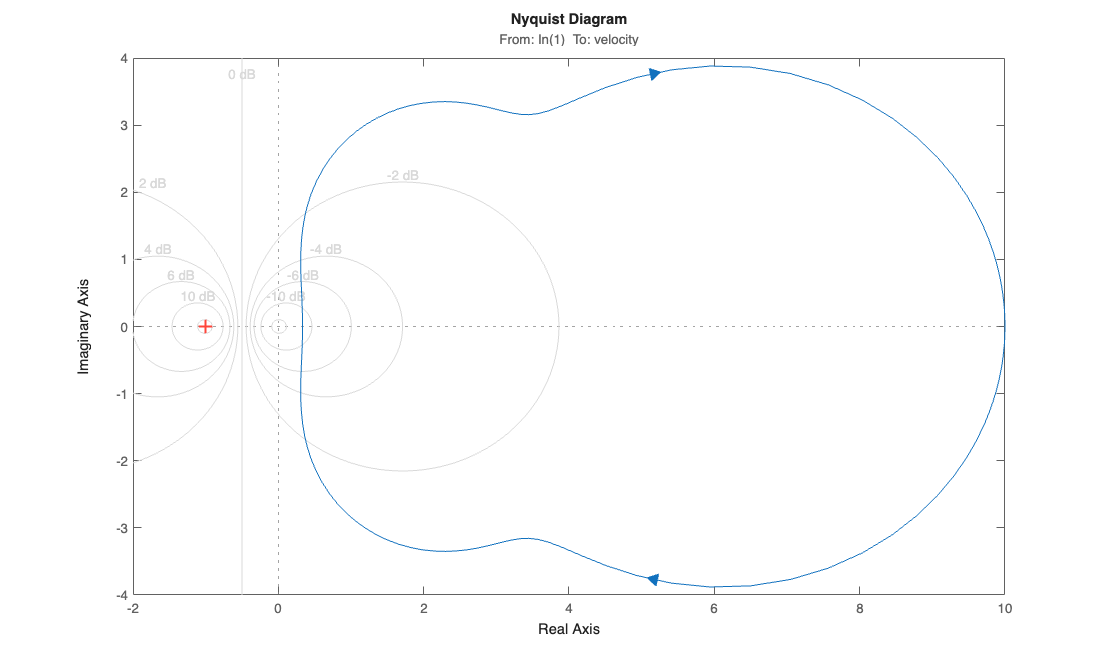

In [35]:
nyquist(G*H),grid

In [36]:
k = 5; z = [-2]; p = [0; -3; -10]; % zero-pole-gain form
C = zpk(z,p,k);
[num,den] = tfdata(C,'v')
%
% (Note that the leading terms in num are zero).

num =
     0     0     5    10
den =
     1    13    30     0


In [37]:
[r,p,k] = residue(num,den)

r =
   -0.5714
    0.2381
    0.3333
p =
   -10
    -3
     0
k =
     []



newC =
 
     5 s + 10
  ---------------
  s^2 + 13 s + 30
 
Continuous-time transfer function.


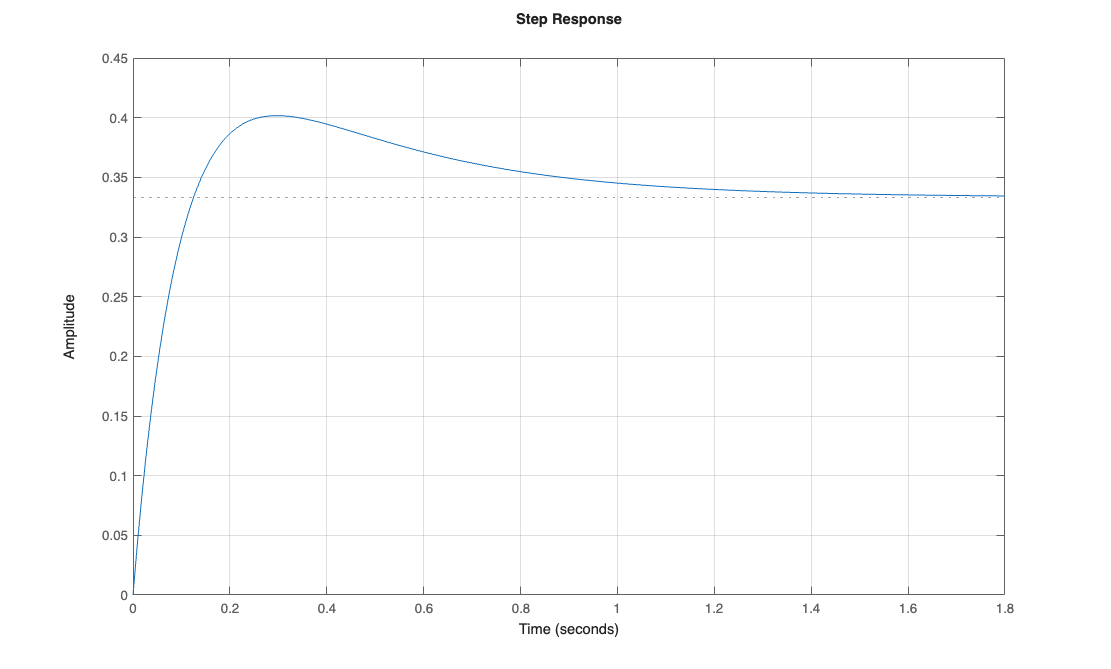

In [38]:
newC = tf([5, 10],[1, 13, 30])
step(newC),grid % provides $u_0(t)$

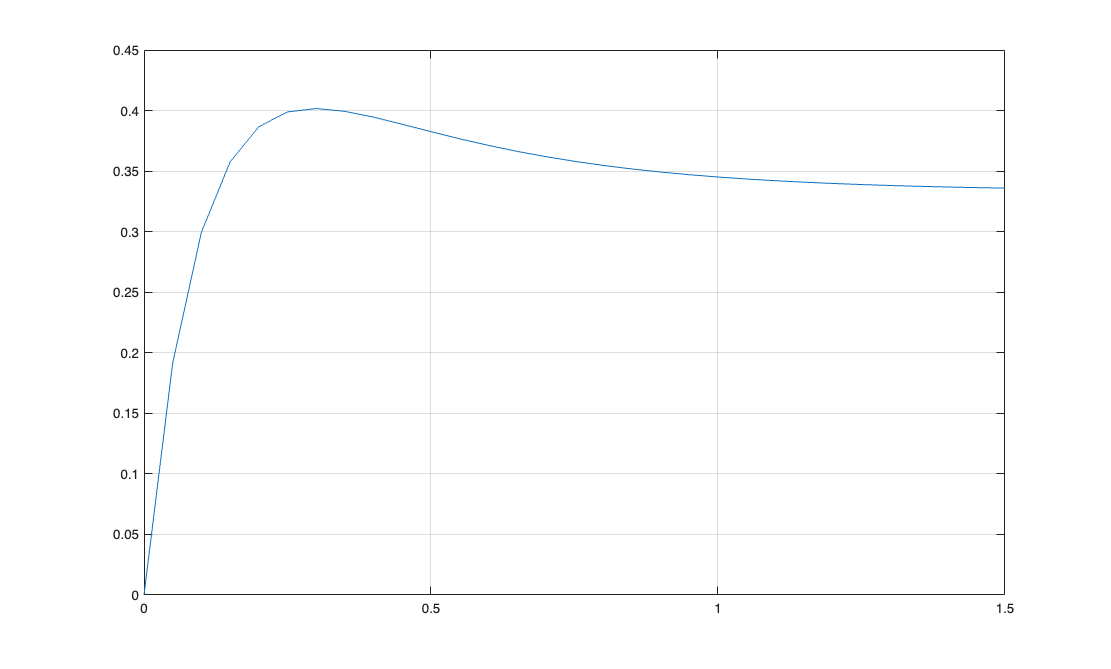

In [39]:
t = 0:.05:1.5; % time vector
c = 0.3333 + 0.2381 * exp(-3*t) - 0.5714 * exp(-10*t);
plot(t,c),grid

In [40]:
G = tf([-1],[1 3 1])


G =
 
       -1
  -------------
  s^2 + 3 s + 1
 
Continuous-time transfer function.


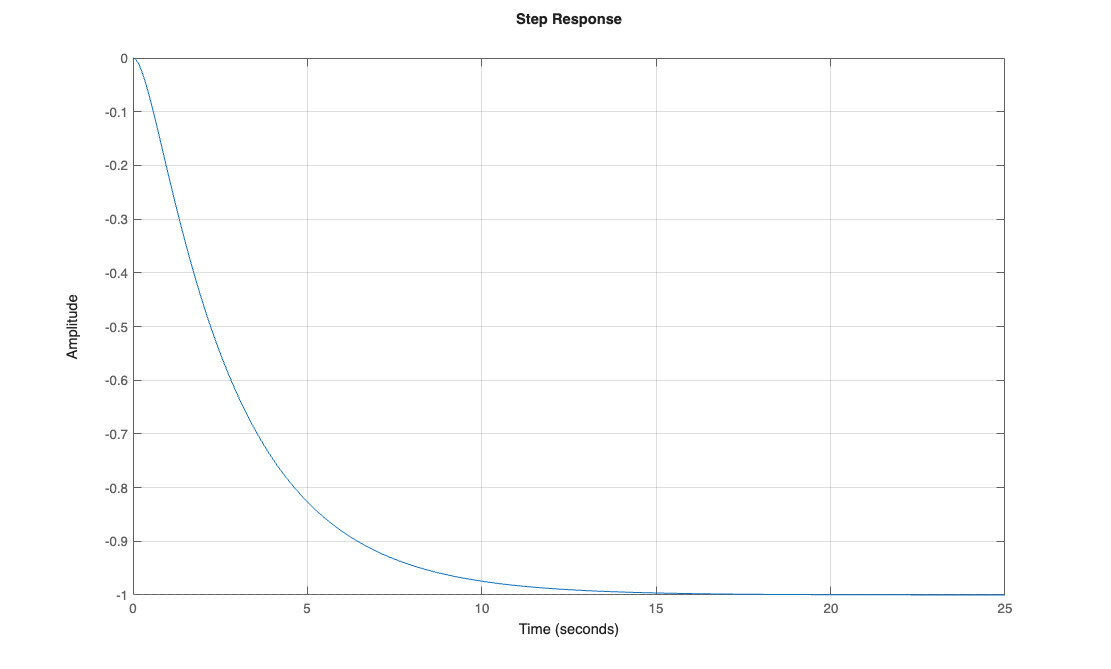

In [41]:
step(G),grid

In [42]:
cd('/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab')
open example_15_1

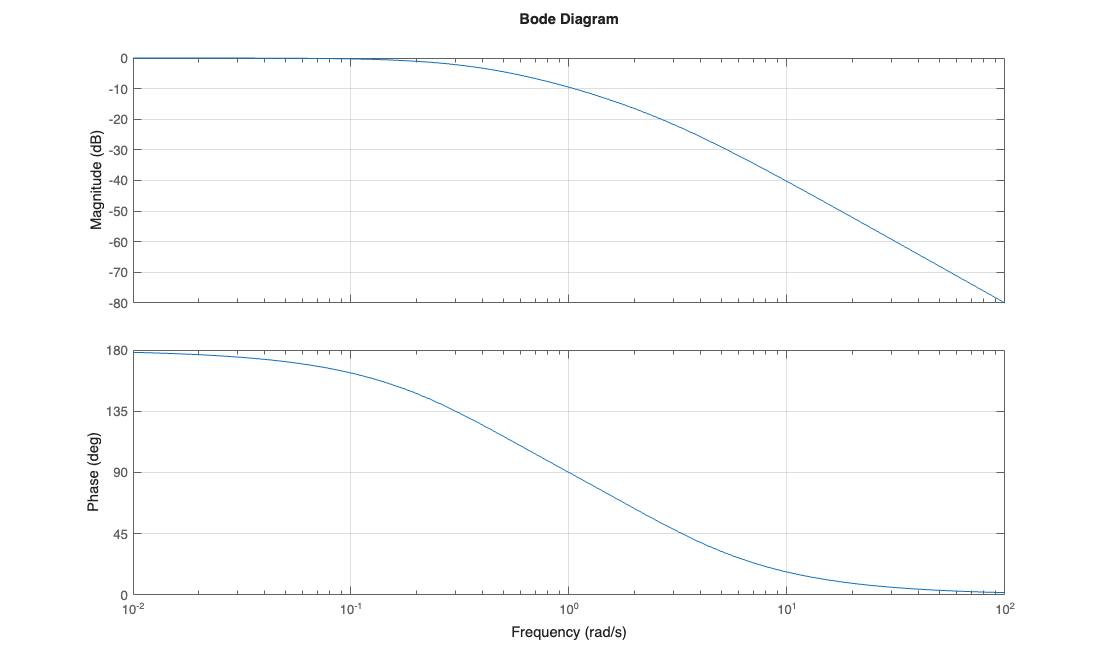

In [43]:
bode(G),grid